**HOUSE PRICE PREDICTION - Internship project**

*Importing the necessary libraries*

In [100]:
#Importing the necessary libraries and dataset

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline


*Loading the dataset*

In [101]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Housing_data/Housing.csv'
df = pd.read_csv(file_path)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        

*EDA - Exploratory Data Analysis*

In [102]:
#Initial explorations
print(df.shape)
print(df.info())
print(df.describe())

(545, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000

In [103]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [104]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


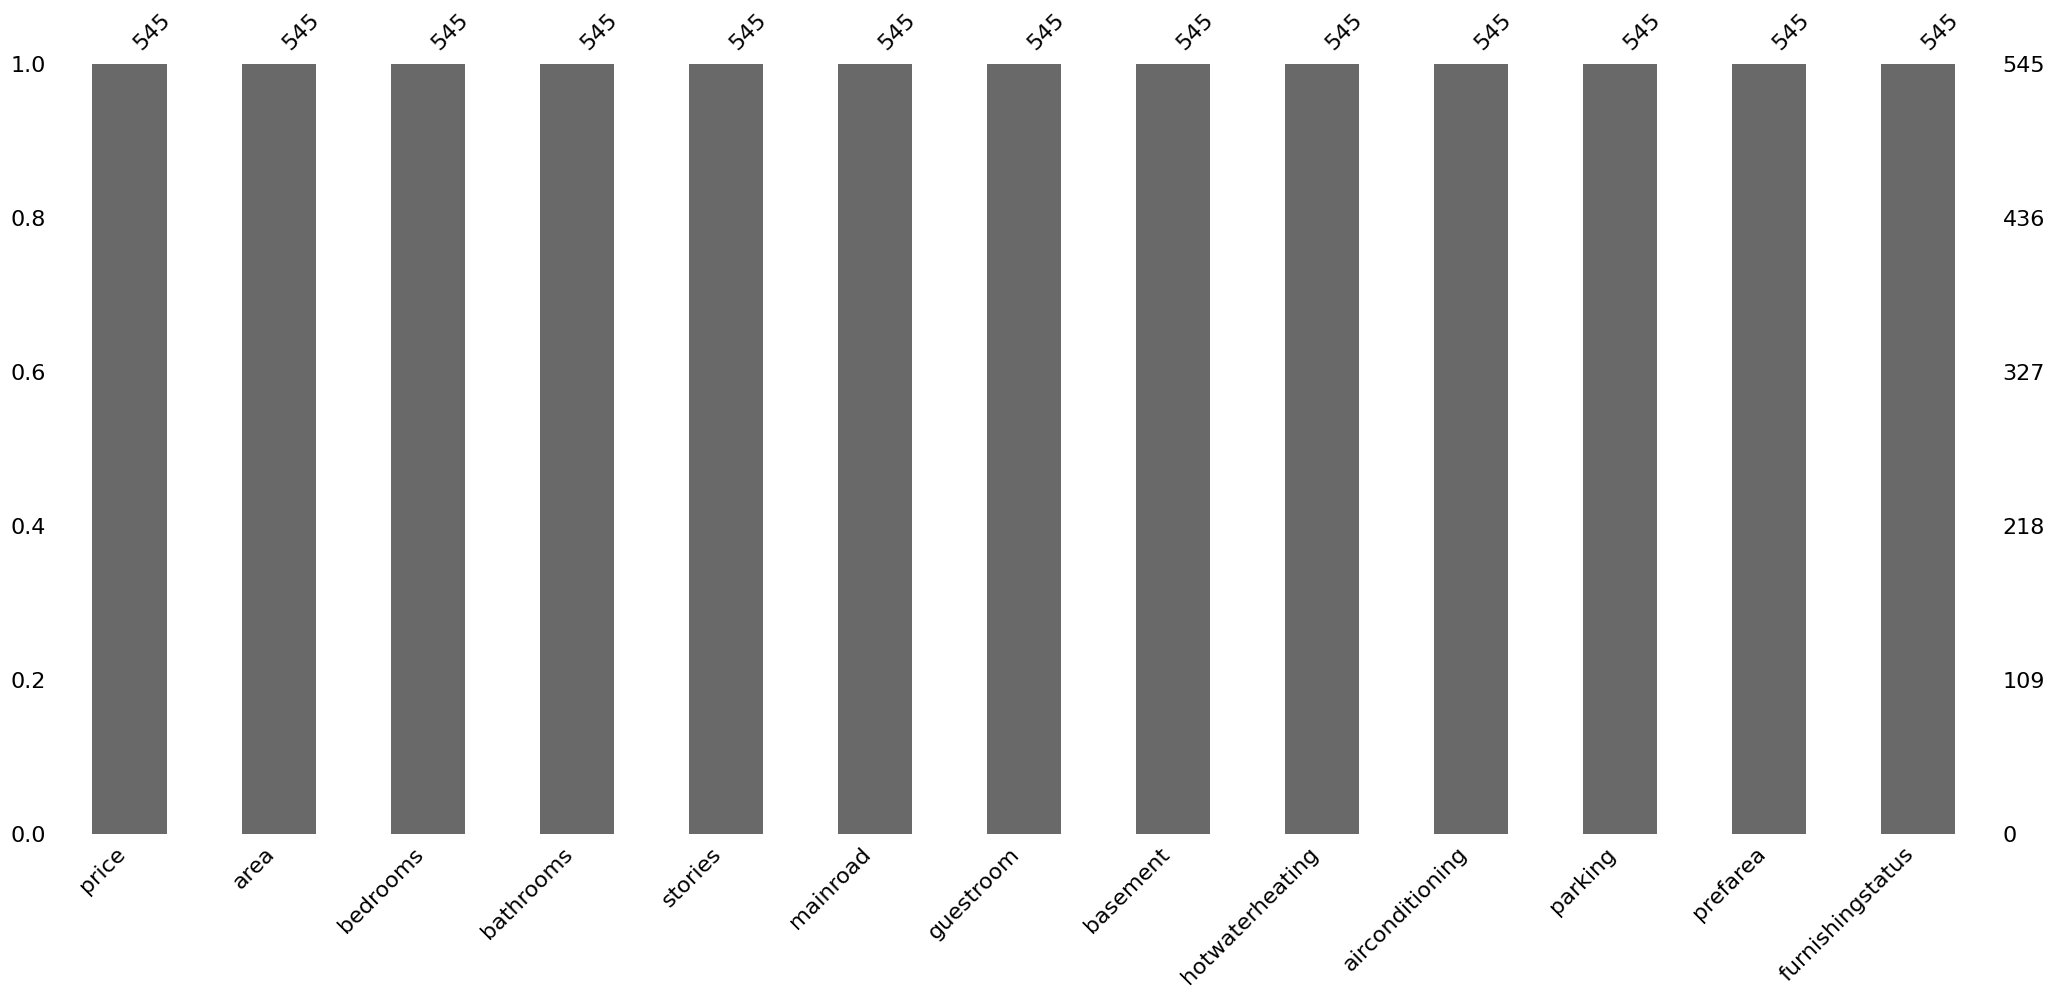

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [105]:
#Checking for missing values
import missingno as msno

msno.bar(df)
plt.show()
print(df.isnull().sum())

In [106]:
df.dropna(inplace=True)

*Correlations*

In [107]:
# Convert categorical features to numerical using one-hot encoding
df_numeric = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

# Calculate correlation on the numeric DataFrame
Correlation = df_numeric.corr()

# Display the correlation matrix (optional, but helpful)
display(Correlation)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


*EDA Visualizations*

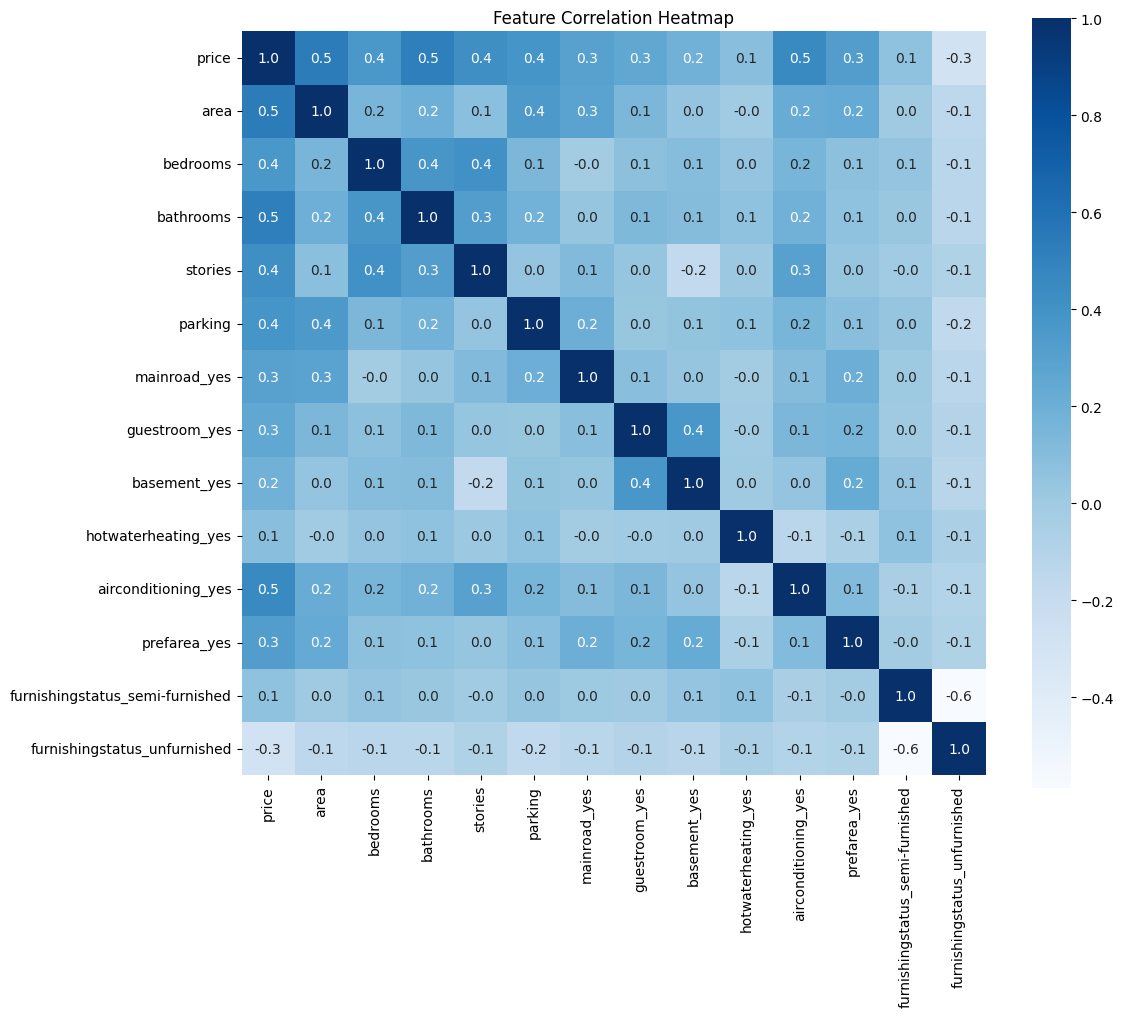

In [108]:
# Correlation heatmap
# Convert categorical features to numerical using one-hot encoding
df_numeric = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)

plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), cbar=True, square=True, fmt='.1f', annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()

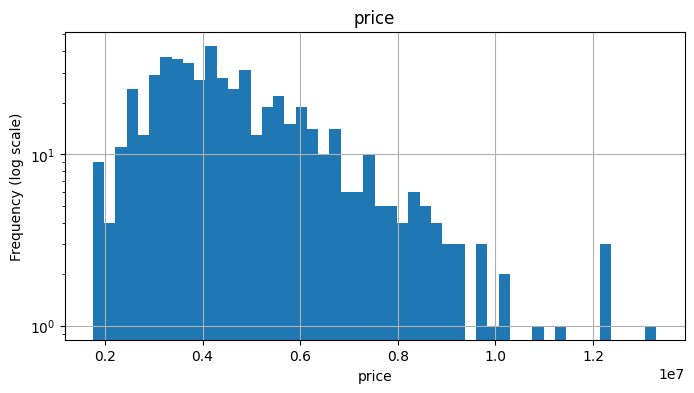

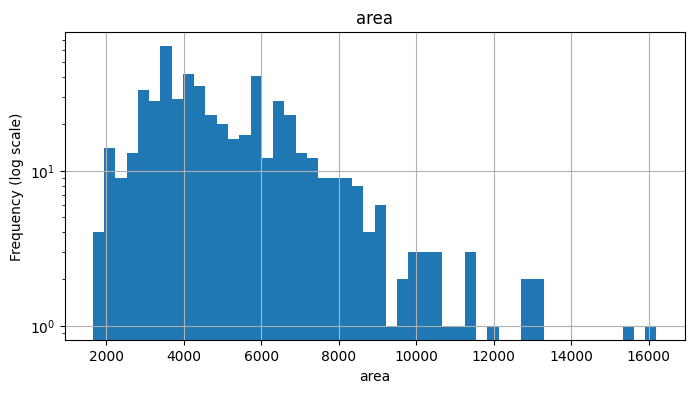

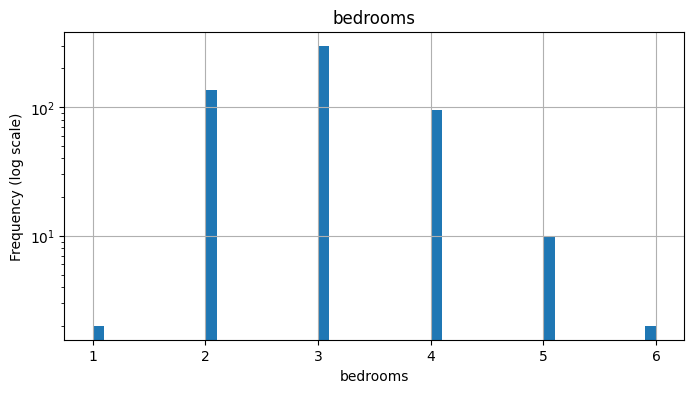

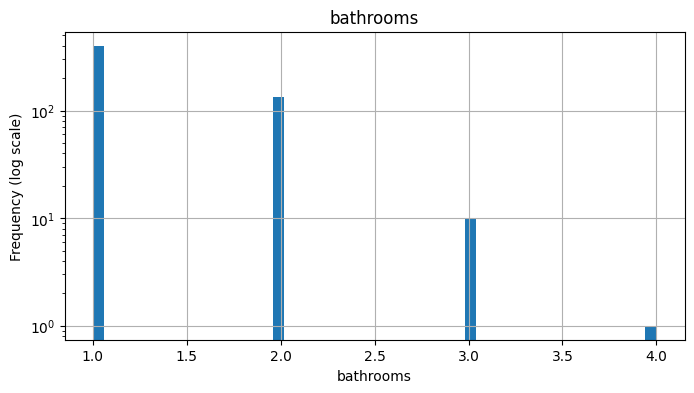

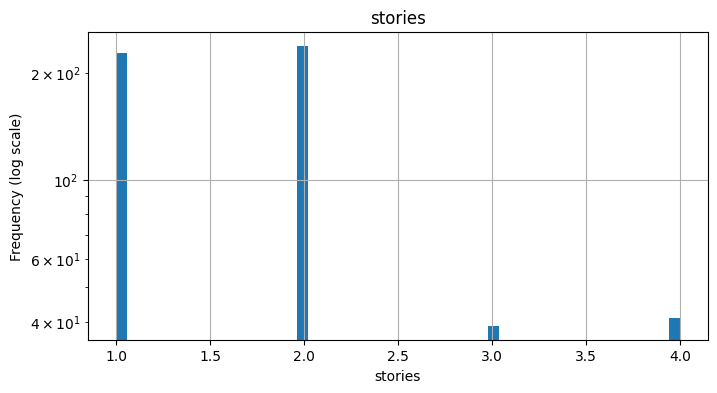

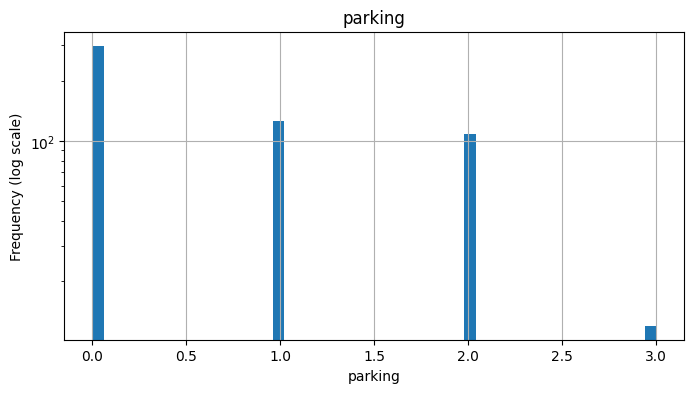

In [109]:
# Histograms
for col in df.select_dtypes(include='number').columns:
    df[col].hist(bins=50, figsize=(8, 4))
    plt.yscale('log')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency (log scale)')
    plt.grid(True)
    plt.show()

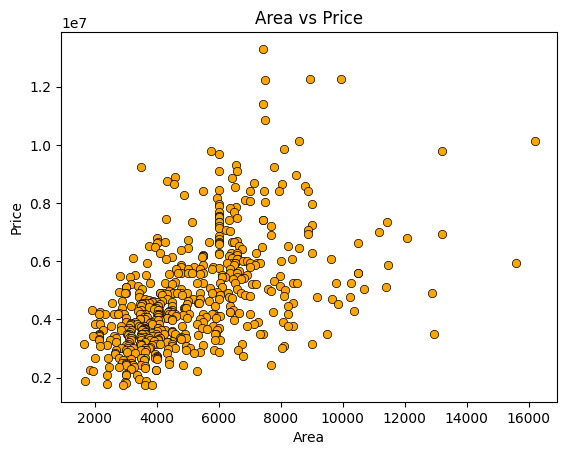

In [110]:
# Scatter plot for price vs area
plt.scatter(df['area'], df['price'], color="orange", edgecolors="#000", linewidths=0.5)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()

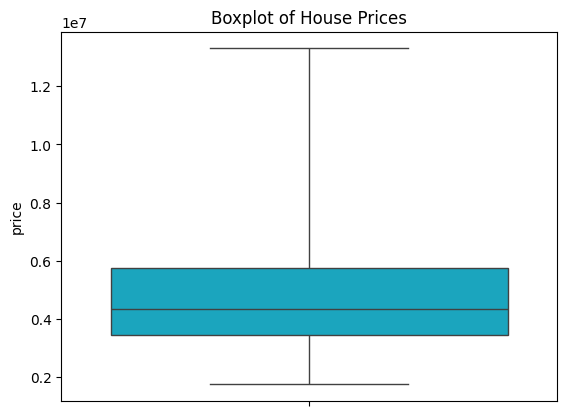

In [111]:
# Boxplot of house prices
sns.boxplot(df['price'], whis=10, color="#00B8D9")
plt.title("Boxplot of House Prices")
plt.show()

*Feature Engineering*

In [112]:
# Split features and target
X = df.drop(['price'], axis=1)
y = df['price']

In [113]:
# Process features
X_numeric = X.select_dtypes(include=np.number)
X_categorical = X.select_dtypes(exclude=np.number)
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)
X_processed = pd.concat([X_numeric, X_categorical_encoded], axis=1)

*Feature Scaling*

In [114]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

*Training and TEsting the dataset*

In [115]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*Models and Parametrs *

In [116]:
# Models and Parameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='neg_mean_squared_error'),
    'Lasso Regression': GridSearchCV(Lasso(max_iter=10000), {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}, cv=5, scoring='neg_mean_squared_error'),
    'Random Forest': GridSearchCV(RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    }, cv=3, scoring='neg_mean_squared_error')
}

In [117]:
# Initialize dictionary for results
results = {}

*Model training and Evaluation*

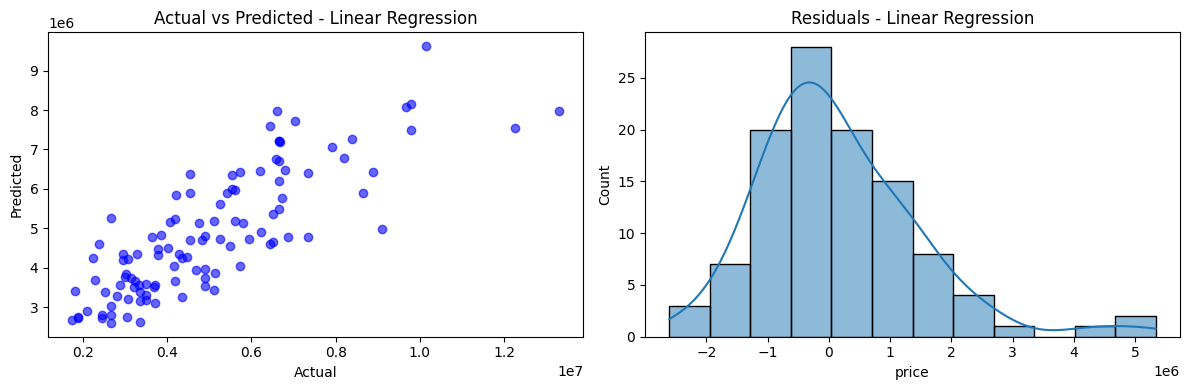

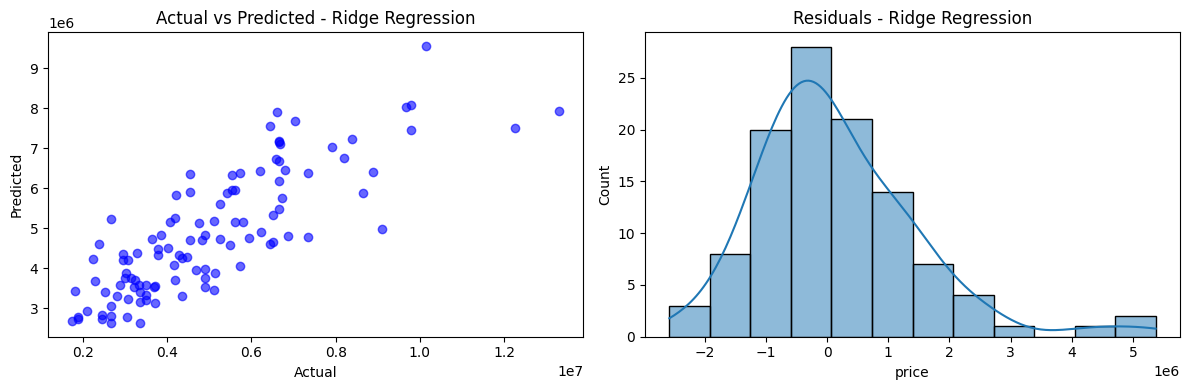

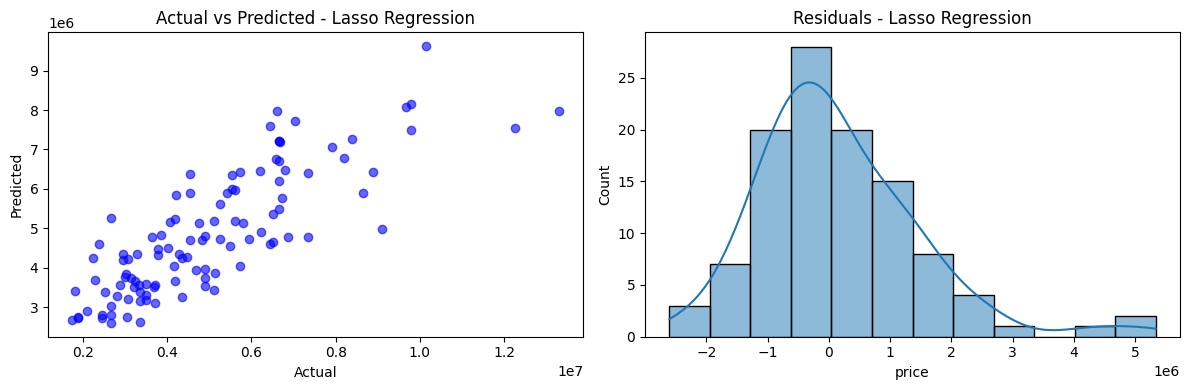

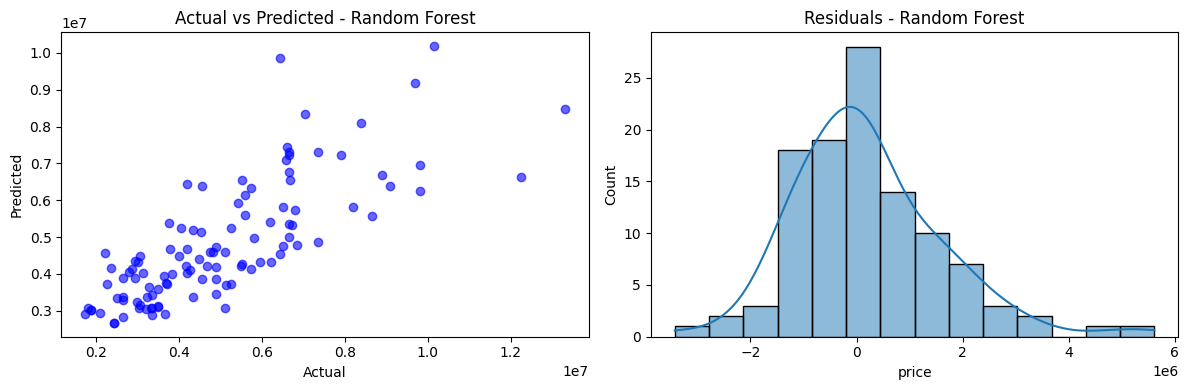

In [118]:
# Model Training & Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    best_model = model.best_estimator_ if isinstance(model, GridSearchCV) else model
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }

    # Visualization
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Actual vs Predicted
    axs[0].scatter(y_test, y_pred, alpha=0.6, color='blue')
    axs[0].set_title(f'Actual vs Predicted - {name}')
    axs[0].set_xlabel('Actual')
    axs[0].set_ylabel('Predicted')

    # Residual Plot
    residuals = y_test - y_pred
    sns.histplot(residuals, kde=True, ax=axs[1])
    axs[1].set_title(f'Residuals - {name}')

    plt.tight_layout()
    plt.show()


In [119]:
# Display Summary Table
results_df = pd.DataFrame(results).T
results_df = results_df[['MAE', 'MSE', 'RMSE', 'R2 Score']]  # Ensure consistent column order

print("Model Performance Summary (Best values highlighted):")
display(results_df.style.highlight_min(subset=['MAE', 'MSE', 'RMSE'], color='lightgreen')
                        .highlight_max(subset=['R2 Score'], color='lightblue'))


Model Performance Summary (Best values highlighted):


,MAE,MSE,RMSE,R2 Score
Linear Regression,970043.403920,1754318687330.667480,1324506.960091,0.652924
Ridge Regression,967942.621609,1759455843663.388184,1326444.813652,0.651908
Lasso Regression,970043.383801,1754319956976.201660,1324507.439381,0.652924
Random Forest,1032500.745787,2026376501842.633301,1423508.518360,0.599100


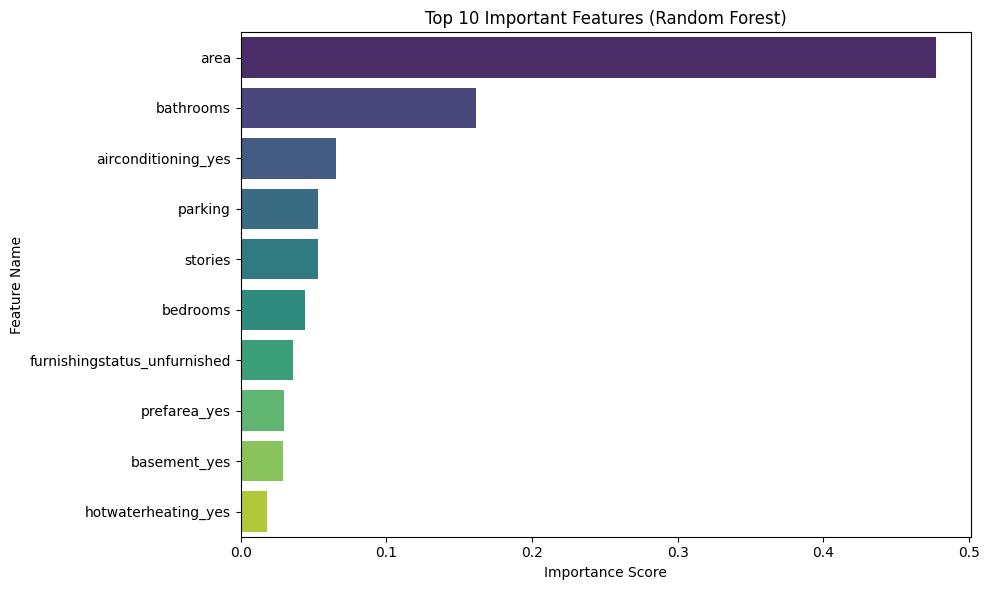

In [120]:
# Feature Importance from Random Forest (Top 10)
rf_model = models['Random Forest'].best_estimator_

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_processed.columns

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()
